In [1]:
import requests
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import dateutil.parser
import pickle
import unicodedata
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# Reconstructing the original object hierarchy
with open("totalFrame.pkl", 'r') as picklefile: 
    totalFrame = pickle.load(picklefile)

In [3]:
#Reset point in case I screw up
df = totalFrame

In [4]:
df['Multiple of Gross'] = df['Total Gross'] / df['Opening Gross']

In [5]:
df.sort(columns='Multiple of Gross')

,Rank,Title,Studio,Total Gross,Total Theaters,Opening Gross,Opening Theaters,Opening Date,Closing Date,Year,Multiple of Gross
245,246,Unbranded,Grav.,140120,60,140120,60,9/25,-,2015,1.000000
2437,560,Dragon (2012),RTWC,11137,14,11137,14,11/30,12/2,2012,1.000000
1122,633,Kid Cannabis,WGUSA,5565,1,5565,1,4/18,4/20,2014,1.000000
2429,552,Norwegian Wood,RF,13000,3,13000,3,1/6,-,2012,1.000000
168,169,Lost in Hong Kong,WGUSA,537736,28,537736,28,9/25,-,2015,1.000000
1815,625,All is Bright,Anch.,4556,10,4556,10,10/4,10/6,2013,1.000000
2411,534,Space Dogs 3D,EpicPics,14408,5,14408,5,5/18,5/20,2012,1.000000
2394,517,Long Shot: The Kevin Laue Story,DM,16011,1,16011,1,10/26,11/1,2012,1.000000
2442,565,Special Forces,EOne,10759,5,10759,5,10/12,-,2012,1.000000
1823,633,Weekend of a Champion,SD,4100,2,4100,2,11/22,11/24,2013,1.000000


In [6]:
theaterCountRatio = df['Opening Theaters'] / df['Total Theaters']
theaterCountRatio.order()

1193    0.000267
1972    0.000496
1214    0.000609
490     0.001030
563     0.001567
525     0.001665
1909    0.001697
65      0.001996
1269    0.002074
1286    0.002166
1316    0.002175
1207    0.002282
117     0.002290
79      0.002417
1299    0.002525
610     0.002715
544     0.002727
1305    0.002759
1298    0.003040
1270    0.003265
567     0.003298
1290    0.003470
102     0.003770
603     0.003840
1326    0.003960
574     0.004098
1307    0.004132
1951    0.004329
579     0.004622
1276    0.004677
          ...   
1724    1.000000
1725    1.000000
806     1.000000
1727    1.000000
804     1.000000
1730    1.000000
803     1.000000
1732    1.000000
1733    1.000000
1735    1.000000
1737    1.000000
1738    1.000000
1759    1.000000
1739    1.000000
794     1.000000
1743    1.000000
1745    1.000000
793     1.000000
789     1.000000
1748    1.000000
787     1.000000
785     1.000000
782     1.000000
1752    1.000000
781     1.000000
1754    1.000000
777     1.000000
1757    1.0000

In [7]:
oktheaterCountRatio = df[(df['Opening Theaters'] / df['Total Theaters']) > 0.8]
oktheaterCountRatio

,Rank,Title,Studio,Total Gross,Total Theaters,Opening Gross,Opening Theaters,Opening Date,Closing Date,Year,Multiple of Gross
0,1,Jurassic World,Uni.,650518931,4291,208806270,4274,6/12,-,2015,3.115419
1,2,Avengers: Age of Ultron,BV,458924272,4276,191271109,4276,5/1,-,2015,2.399339
2,3,Inside Out,BV,353584508,4158,90440272,3946,6/19,-,2015,3.909591
3,4,Furious 7,Uni.,351032910,4022,147187040,4004,4/3,-,2015,2.384944
4,5,Minions,Uni.,333582795,4311,115718405,4301,7/10,-,2015,2.882712
5,6,Cinderella (2015),BV,201151353,3848,67877361,3845,3/13,9/17,2015,2.963453
6,7,Mission: Impossible - Rogue Nation,Par.,193715765,3988,55520089,3956,7/31,-,2015,3.489111
7,8,Pitch Perfect 2,Uni.,183785415,3660,69216890,3473,5/15,7/30,2015,2.655211
8,9,Ant-Man,BV,178328341,3868,57225526,3856,7/17,-,2015,3.116238
9,10,Home (2015),Fox,177397510,3801,52107731,3708,3/27,-,2015,3.404437


In [8]:
print float(len(oktheaterCountRatio)) / len(df)

0.563428086551


In [9]:
okdf = oktheaterCountRatio[oktheaterCountRatio['Total Theaters'] >= 100]

In [10]:
okdf.sort(columns='Multiple of Gross', ascending=False)

,Rank,Title,Studio,Total Gross,Total Theaters,Opening Gross,Opening Theaters,Opening Date,Closing Date,Year,Multiple of Gross
1971,94,"Monsters, Inc. (3D)",BV,34043006,2618,4774686,2618,12/19,5/2,2012,7.129894
1964,87,The Guilt Trip,Par.,37134215,2431,5290629,2431,12/19,3/7,2012,7.018866
1899,22,Argo,WB,136025503,3247,19458109,3232,10/12,4/24,2012,6.990685
516,27,Night at the Museum: Secret of the Tomb,Fox,113746621,3914,17100520,3785,12/19,7/9,2014,6.651647
1218,28,The Wolf of Wall Street,Par.,116900694,2557,18361578,2537,12/25,4/3,2013,6.366593
1920,43,This Is 40,Uni.,67544505,2931,11579175,2912,12/21,2/28,2012,5.833274
2009,132,Cirque Du Soleil: Worlds Away,Par.,12512862,840,2162993,840,12/21,2/14,2012,5.784976
1206,16,We're the Millers,WB,150394119,3445,26419396,3260,8/7,12/5,2013,5.692565
1904,27,Life of Pi,Fox,124987023,2946,22451514,2927,11/21,7/25,2012,5.566975
1895,18,Les Miserables (2012),Uni.,148809770,2927,27281735,2814,12/25,4/4,2012,5.454557


In [11]:
print 'ok by no. of theaters and open to all ratio: ' + str(len(okdf))
print 'original length: ' + str(len(totalFrame))
print 'Percent remaining: ' + str(float(len(okdf)) / len(totalFrame))

ok by no. of theaters and open to all ratio: 601
original length: 2357
Percent remaining: 0.254985150615


In [12]:
high_df = okdf[okdf['Multiple of Gross'] > 4.0]
print len(high_df)

47


In [13]:
print 'For movies that open in at least 80% of its total theater count,'
print 'there is at least ' + str(float(len(high_df))/len(okdf)*100) + '% chance the'
print 'movie will make a total gross at least 4 times the opening gross.'

For movies that open in at least 80% of its total theater count,
there is at least 7.82029950083% chance the
movie will make a total gross at least 4 times the opening gross.


In [30]:
plot_df = pd.DataFrame()

In [31]:
plot_df['Total Gross'] = okdf['Total Gross']
plot_df['Total Gross'] = sorted(plot_df['Total Gross'])

In [32]:
plot_df['Opening Gross'] = okdf['Opening Gross']
plot_df['Opening Gross'] = sorted(plot_df['Opening Gross'])

In [ ]:
plot_df

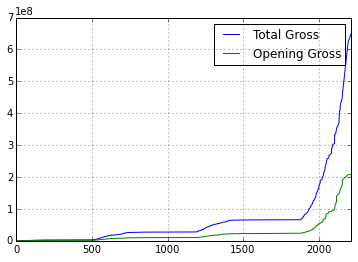

In [33]:
%matplotlib inline
plot_df.plot()
plt.show()

In [26]:
with open('okdf.pkl', 'w') as picklefile:
    pickle.dump(okdf, picklefile)